# Lineare Optimierung - Vorlesung

**Themenüberblick:** 

- Lösungsstruktur von LPs: Begriffe (optimale Werte und Punkte etc.), Umformulierungen ($=$ zu $\leq$, $\geq$ zu $\leq$), geometrische Darstellung von $A x \leq b$, Fälle inkl. Eindeutigkeit und Existenz, Ecken-Theorem
- Modellieren: an einem Beispiel, inkl. Schattenpreisen
- Implementieren: mit SciPy-Solver linprog

**zusätzliche Unterlagen:** `8_Lineare_Optimierung-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
from scipy.optimize import linprog

Populating the interactive namespace from numpy and matplotlib


## Lösungsstruktur

Aus der letzen Vorlesung wissen wir, dass sich jedes LP mit entsprechenden Vektoren und Matrizen in Vektor-/Matrixform als

$$\begin{align}
\text{min.}\; 
c^T x &       \\
\text{s.t.}\;  
  A x & \leq b \\
  G x &  =   h 
\end{align}$$

schreiben läßt.

**Begriffe:**

- Eine **Entscheidung** $x$ des **Entscheidungsraums** $\mathbb{R}^n$ wird **zulässiger Punkt (zulässige Entscheidung, zulässiger Entscheidungsvektor)** genannt, wenn sie alle Nebenbedingungen (hier $Ax \leq b$ und $Gx = h$) erfüllt.
- Der **zulässige Bereich** eines LP ist die Menge aller zulässigen Punkte. 
- Der **optimale Wert** eines LP ist das Optimum (Minimum bzw. Maximum) der Zielfunktion unter den Nebenbedingungen. Er kann auch $-\infty$ oder $\infty$ sein.
- Ein **optimaler Punkt** (eine **Lösung**) eines LP ist ein zulässiger Punkt, der den optimalen Wert erreicht.
- Die **optimale Menge** eines LP ist die Menge aller optimalen Punkte des LP.

**Ungleichungsform von LPs:**

Die Formulierung min. $c^T x$ unter $Ax \leq b$ und $Gx = h$ kann man noch weiter vereinfachen, indem die vorkommenden Gleichungen zu $\leq$ Ungleichungen umgeschrieben werden. Zum Beispiel entspricht die Gleichung $3x_1 - 4x_2 = 5$ den beiden Ungleichungen $3x_1 - 4x_2 \leq 5$ und $3x_1 - 4x_2 \geq 5$, von denen die zweite durch Multiplikation mit -1 auch zu einer $\leq$ Ungleichung gemacht wird. Dadurch kann die Gleichung durch die zwei $\leq$ Ungleichungen $3x_1 - 4x_2 \leq 5$ und $-3x_1 + 4x_2 \leq -5$ ersetzt werden.

Jedes LP läßt sich somit auch in der Ungleichungsform

$$\begin{align}
\text{min.}\; 
c^T x &      \\
\text{s.t.}\;  
  A x & \leq b 
\end{align}$$

schreiben. 

**Geometrische Darstellung:**

- Die Zielfunktion $c^T x$ eines LP ist eine lineare Funktion, deren Konturlinien **Hyperebenen** im Entscheidungsraum $\mathbb{R}^n$ sind.
- Die Matrixungleichung $Ax \leq b$ besteht aus übereinandergestapelten linearen Ungleichungen, die im Entscheidungsraum $\mathbb{R}^n$ jeweils **Halbräume** definieren. Der zulässige Bereich des LP, d. h. die Menge aller Entscheidungen $x$, die die Bedingung $Ax \leq b$ erfüllen,  entspricht somit dem Durchschnitt all dieser Halbräume. Der Durchschnitt von Halbräumen wird **Polyeder** genannt.

*Bemerkungen:* Ein Polyeder ist *konvex*, d. h. für zwei beliebiege Punkte des Polyeders liegt deren Verbindungslinie vollständig im Polyeder: $\forall x,y\in P=\{x\rvert Ax\leq b\}$ und $\forall \lambda$ mit $0\leq \lambda\leq 1$ ist $\lambda x + (1-\lambda) y \in P$. Der Ausdruck $\lambda x + (1-\lambda) y$ mit $0\leq \lambda\leq 1$ wird konvexe Kombination von $x$ und $y$ genannt und ergibt einen Punkt auf der Verbindungslinie zwischen $x$ und $y$.

**Fälle:**

Ein LP fällt in einen der folgenden fünf Fälle.

- Fall A: Es gibt eine eindeutige Lösung an einer Ecke des Polyeders, also genau einen optimalen Punkt. Der optimale Wert ist endlich.
- Fall B: Alle Punkte auf einer endlichen Kante des Polyeders sind optimale Punkte. Es gibt somit $\infty$-viele Lösungen, die konvexen Kombinationen der optimalen Ecken bilden die optimale Mengen. Der optimale Wert ist endlich.
- Fall C: Alle Punkte auf einer unendlichen Kante des Polyeders sind optimale Punkte. Es gibt somit $\infty$-viele Lösungen, die keine konvexe Kombinationen von optimalen Ecken sind. Der optimale Wert ist endlich.
- Fall D: Das Polyeder ist leer. Es gibt keine zulässigen Punkte. Die Nebenbedingungen schließen sich aus. Das LP heißt **unzulässig** (engl. infeasible). Der optimale Wert eines Minimierungs-LP ist $+\infty$, jener eines Maximierungs-LP ist $-\infty$.
- Fall E: Das Polyeder ist unbeschränkt in Richtung der Zielfunktion. Das LP heißt **unbeschränkt** (engl. unbounded). Der optimale Wert des Minimierungs-LP ist $-\infty$, jener eines Maximierungs-LP ist $+\infty$.

![LP_Loesungsstruktur](abbildungen/LP_Loesungsstruktur.png)

Zusammenfassung für Minimierungs-LPs:

| LP           | Polyeder                                  | optimaler Wert | optimale Menge                                   |
| ------------ | ----------------------------------------- | -------------- | ------------------------------------------------ |
| unzulässig   | leer                                      | $+\infty$      | leer                                             |
| unbeschränkt | unbeschränkt in Richtung der Zielfunktion | $-\infty$      | leer                                             |
| andernfalls  | andernfalls                               | endlich        | besteht aus einer  oder $\infty$-vielen Lösungen |

Vergleich mit Status-Rückgabewerten des LP-Solvers `linprog`:

    status : An integer representing the exit status of the optimization:
        0 : Optimization terminated successfully
        1 : Iteration limit reached
        2 : Problem appears to be infeasible
        3 : Problem appears to be unbounded

**Ecken-Theorem: Falls das Polyeder der Nebenbedingungen mindestens eine Ecke hat und der optimale Wert endlich ist, dann gibt es zumindest eine Ecke des Polyeders, die ein optimaler Punkt ist.**

*Folgerung:* Daher könnte man so vorgehen, dass man zuerst alle Ecken bestimmt und dann jene Ecke(n) mit dem besten Zielfunktionswert als optimale(n) Punkt(e) identifiziert. Diese Vorgehensweise ist für große LP aber nicht effizient.

*Simplexalgorithmus:* Der Simplexalgorithmus löst ein LP, indem von einer Ecke zu einer nächsten Ecke gesprungen wird, deren Zielfunktionswert besser ist, bis dies nicht mehr möglich ist und dadurch eine Lösung gefunden wurde.

## Modellieren

**Beispiel: Butter und Eiscreme**

*Quelle:* Ferris, Mangasarian, Wright: Linear Programming with MATLAB. SIAM (Society for Industrial and Applied Mathematics), 2008

**Fragestellung:** Ein Bauer hat 3 Kühe, die in Summe 22 Gallonen (1 Gallone $\simeq$ 3.785 Liter)  Milch pro Woche geben. Aus der Milch kann er Eiscreme und Butter machen. Er braucht 2 Gallonen Milch für 1 kg Butter und 3 Gallonen Milch für 1 Gallone Eiscreme. Es gibt keine Lagerrestriktionen für Butter. Er kann maximal 6 Gallonen Eiscreme lagern. Er hat 6 Arbeitsstunden pro Woche für die Herstellung zur Verfügung. Für 4 Gallonen Eiscreme benötigt er 1 Stunde, für 1 kg Butter benötigt er ebenfalls 1 Stunde. Die gesamte Produktion kann er zu folgenden Preisen verkaufen (vollständiger Absatz): 5 USD pro Gallone Eiscreme, 4 USD pro kg Butter. 
Wieviele Gallonen Eiscreme und wieviele kg Butter soll er herstellen, sodass er seinen Profit maximiert?

**Modellierung:**

Entscheidungsvariablen:

- $x_1$: produzierte Gallonen Eiscreme
- $x_2$: produzierte kg Butter 

Zielfunktion: Maximiere $5x_1 + 4x_2$.

Nebenbedingungen: 

- Lagerung von Eiscreme: $x_1 \leq 6$
- Arbeitszeit: $\frac{1}{4}x_1 + x_2 \leq 6$
- verfügbare Milch: $3x_1 + 2x_2 \leq 22$
- Positivität der Variablen: $x_1\geq 0, x_2\geq 0$

Vektor-/Matrixform:

$$\begin{align}
\text{max.}\; 
5 x_1 + 4 x_2    & \\
\text{s.t.}\;  
           x_1         & \leq  6 \\
\frac{1}{4}x_1 +  x_2  & \leq  6 \\
          3x_1 + 2x_2  & \leq 22 \\
           x_1         & \geq  0 \\
                  x_2  & \geq  0 
\end{align}$$

## Implementieren

Wir setzen das obige Beispiel fort und füttern den Solver `linprog` mit den Daten des Problems, d. h. mit den Vektoren und Matrizen, die die Zielfunktion und die Nebenbedingungen eindeutig beschreiben.

In [2]:
c = array([-5, -4])
A = array([[   1,  0],
           [0.25,  1],
           [   3,  2]])
b = array([6, 6, 22])

In [3]:
# by default bounds are (0, None)!
res = linprog(c, A_ub=A, b_ub=b, method='revised simplex')
print("Resultate gesamt:\n", res)
print("optimaler Wert:", -res.fun)
print("optimaler Punkt:", res.x)

Resultate gesamt:
      con: array([], dtype=float64)
     fun: -40.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([2., 0., 0.])
  status: 0
 success: True
       x: array([4., 5.])
optimaler Wert: 40.0
optimaler Punkt: [4. 5.]


Grafische Darstellungen:

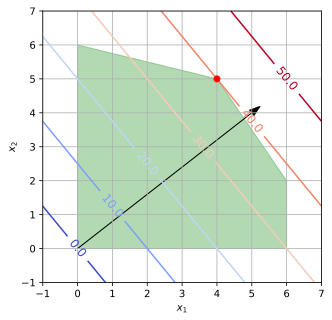

In [4]:
ecken = array([[0,0],
               [6,0],
               [6,2],
               [4,5],
               [0,6]])
delta = 1
x1 = arange(-1, 8, delta)
x2 = arange(-1, 8, delta)
X1, X2 = meshgrid(x1, x2)

p = array([5, 4])
Z = p[0]*X1 + p[1]*X2

fig = figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.add_patch(Polygon(ecken, closed=True, color='green', alpha=0.3))
arrow(0, 0, p[0], p[1], head_width=0.2, fc='k')
CS = contour(X1, X2, Z, levels= [0,10,20,30, 40,50], cmap= 'coolwarm')
clabel(CS, inline=1, fontsize=12, fmt='%1.1f')
plot(res.x[0], res.x[1], 'or')
xlim(-1,7)
ylim(-1,7)
xlabel('$x_1$')
ylabel('$x_2$')
grid(True)

**Varianten und Solverantworten:**

Fall B: Alle Punkte auf einer endlichen Kante des Polyeders sind optimale Punkte.

In [5]:
c = array([-3, -2]) # Zielfunktion parallel zur Milch-Nebenbedingung
A = array([[   1,  0],
           [0.25,  1],
           [   3,  2]])
b = array([6, 6, 22])
res = linprog(c, A_ub=A, b_ub=b, method='revised simplex')
print(res)

# optimaler Wert des zurückgegebenen optimalen Punktes:
print(-dot(c, res.x)) 

# (4,5) ist auch optimaler Punkt:
y = array([4, 5]) 
print(-dot(c, y)) 

# konvexe Kombination:
lbd = 0.123
print(-dot(c, lbd*res.x + (1-lbd)*y)) 

     con: array([], dtype=float64)
     fun: -22.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0. , 2.5, 0. ])
  status: 0
 success: True
       x: array([6., 2.])
22.0
22
22.0


Fall D: Das Polyeder ist leer. Der optimale Wert eines Minimierungs-LP ist $+\infty$.

In [6]:
# Ungleichheitszeichen aller Nebenbedingungen umdrehen:
c = array([-5, -4])
A = array([[   -1,  0],
           [-0.25,  -1],
           [   -3,  -2]])
b = array([-6, -6, -22])
res = linprog(c, A_ub=A, b_ub=b, bounds=(None, 0),  # bounds geändert
              method='revised simplex')
print(res)

     con: array([], dtype=float64)
     fun: 0.0
 message: 'The problem is (trivially) infeasible because a singleton row in the upper bound constraints is inconsistent with the bounds.'
     nit: 0
   slack: array([ -6.,  -6., -22.])
  status: 2
 success: False
       x: array([0., 0.])


Fall E: Das Polyeder ist unbeschränkt in Richtung der Zielfunktion. Der optimale Wert des Minimierungs-LP ist $-\infty$

In [7]:
c = array([5, 4]) # Vorzeichen geändert
A = array([[   1,  0],
           [0.25,  1],
           [   3,  2]])
b = array([6, 6, 22])

res = linprog(c, A_ub=A, b_ub=b, bounds=(None, 0),  # bounds geändert
             method='revised simplex')
print(res)

     con: array([], dtype=float64)
     fun: 0.0
 message: 'The problem is unbounded, as the simplex algorithm found a basic feasible solution from which there is a direction with negative reduced cost in which all decision variables increase.'
     nit: 0
   slack: array([ 6.,  6., 22.])
  status: 3
 success: False
       x: array([0., 0.])


## Schattenpreise

Der Schattenpreis einer Nebenbedingung ist die Änderung des optimalen Wertes bei Lockerung der Nebenbedingung um eine Einheit.

Wir berechnen die Schattenpreise der Nebenbedingungen Lager, Zeit und Milch zuerst direkt:

In [8]:
c = array([-5, -4])
A = array([[   1,  0],   # Lager
           [0.25,  1],   # Zeit
           [   3,  2]])  # Milch
b = array([6 + 1, 6, 22])
res = linprog(c, A_ub=A, b_ub=b, method='revised simplex')
print(-res.fun)

40.0


In [9]:
c = array([-5, -4])
A = array([[   1,  0],   # Lager
           [0.25,  1],   # Zeit
           [   3,  2]])  # Milch
b = array([6, 6 + 1, 22])
res = linprog(c, A_ub=A, b_ub=b, method='revised simplex')
print(-res.fun)

40.8


In [10]:
c = array([-5, -4])
A = array([[   1,  0],   # Lager
           [0.25,  1],   # Zeit
           [   3,  2]])  # Milch
b = array([6, 6, 22 + 1])
res = linprog(c, A_ub=A, b_ub=b, method='revised simplex')
print(-res.fun)

41.6


Die Schattenpreise aller Nebenbedingungen können gleichzeitig mit Hilfe des sogenannten dualen LPs berechnet werden:

Dem primären LP in Ungleichungsform

$$\begin{align}
\text{min.}\; 
c^T x &   \\
\text{s.t.}\;  
  A x & \leq b 
\end{align}$$

entspricht das duale LP

$$\begin{align}
\text{max.}\; 
-b^T z      &   \\
\text{s.t.}\;  
  A^T z + c & =    0 \\
      z     & \geq 0
\end{align}$$

Die Werte des $z$-Lösungsvektors sind die Schattenpreise.

In [11]:
c = array([-5, -4])
A = array([[   1,  0],   # Lager
           [0.25,  1],   # Zeit
           [   3,  2],   # Milch
           [  -1,  0],   # Positivität von x_1
           [   0, -1]])  # Positivität von x_2
b = array([6, 6, 22, 0, 0])

res = linprog(b, A_eq=A.T, b_eq=-c, method='revised simplex')
res

     con: array([-8.8817842e-16,  0.0000000e+00])
     fun: 40.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([0. , 0.8, 1.6, 0. , 0. ])